In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from collections import deque

class Basis():
    """Making coefficient array of given polynomial"""
    
    def __init__(self, p=3, mode='chebyshev', left_border=0.0, right_border=1.0):
        self.mode = mode
        self.P = p
        self.coef = []
        self.left_border = left_border
        self.right_border = right_border
        if (mode == 'chebyshev'):
            deg = deque([1.0])
            for i in range(self.P):
                cheb = np.polynomial.chebyshev.Chebyshev(deg)
                self.coef.append(list(np.polynomial.chebyshev.cheb2poly(cheb.coef))[::-1])
                deg.appendleft(0)
                
        elif (mode == 'ordinary'):
            deg = deque([1.0])
            for i in range(self.P):
                self.coef.append(list(deg)[::-1])
                deg.appendleft(0)
        
        else:
            raise ValueError(f"There is no mode: {mode}")
            
    def calc(self, p, x):
        if ((p >= self.P) or not isinstance(p, int) or p < 0):
            raise ValueError(f"Degree must be non-negative integer less than {self.P}!")
        value = 0
        #print(self.coef[p])
        for i in self.coef[p]:
            value *= x
            value += i
        return value
    
    def matrix(self, x):
        F = []
        for i in range(len(x)):
            line = [0]*self.P
            for j in range(self.P):
                line[j] = self.calc(j, x[i])
            F.append(line)
            
        return F
    
    def draw(self):
        plt.figure(num = None, figsize = (6, 4), dpi = 250)
        plt.title(self.mode)
        x = np.linspace(self.left_border, self.right_border, 100)
        for degree in range(self.P):
            plt.plot(x, self.calc(degree, x), linewidth = 1.0, label = f'{degree}')

0.25


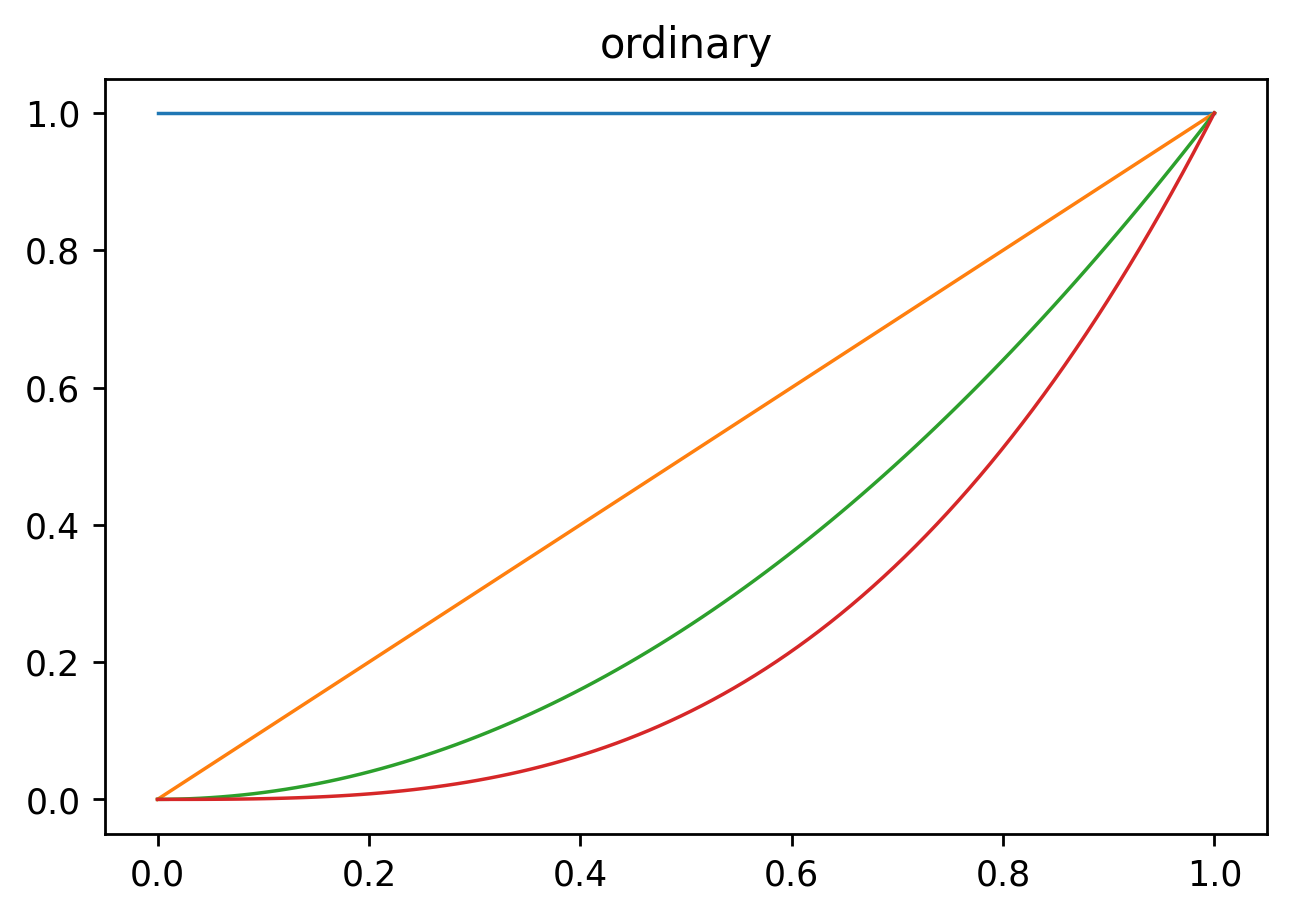

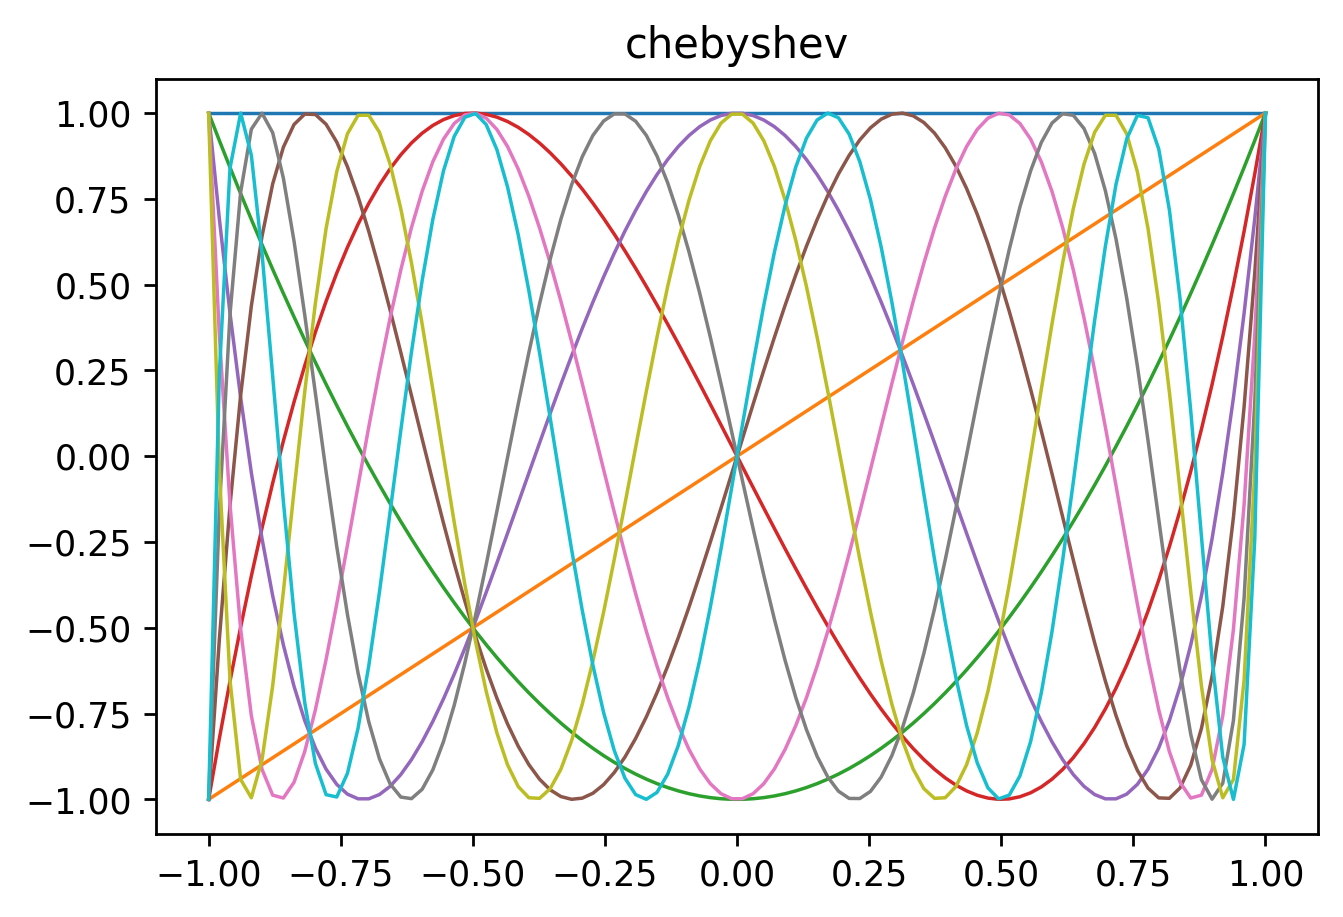

In [5]:
B = Basis(4, 'ordinary')
print(B.calc(2, 0.5))
B.draw()
O = Basis(10, left_border=-1.)
O.draw()